### Import pymongo and gridfs

In [34]:
import os
import pymongo
import gridfs
import glob

### Python MongoDB connection

In [2]:
client=pymongo.MongoClient("mongodb://localhost:27017/")

### Create a Database

In [3]:
db = client["Cars_database"]

### Create an object for Gridfs

In [8]:
fs = gridfs.GridFS(db)

### Read image in Binary format

In [14]:
images_dir="images"
filename="car1.jpeg"

image_path = os.path.join(images_dir,filename)

with open(image_path,'rb') as f:
    image = f.read()

## Inserting Single image

In [15]:
fs.put(image,filename=filename)

ObjectId('641daa8e86c73a1d20cadf0b')

### Find first entry

In [27]:
db.fs.files.find_one()

{'_id': ObjectId('641daa8e86c73a1d20cadf0b'),
 'filename': 'car1.jpeg',
 'chunkSize': 261120,
 'length': 7026,
 'uploadDate': datetime.datetime(2023, 3, 24, 13, 50, 7, 255000)}

### Retrieving field informations

In [29]:
db.fs.files.find_one()['_id']

ObjectId('641daa8e86c73a1d20cadf0b')

In [28]:
db.fs.files.find_one()['filename']

'car1.jpeg'

In [31]:
db.fs.files.find_one()['chunkSize']

261120

In [32]:
db.fs.files.find_one()['length']

7026

In [33]:
db.fs.files.find_one()['uploadDate']

datetime.datetime(2023, 3, 24, 13, 50, 7, 255000)

## Inserting Multiple Images in a directory

In [38]:
for image_path in list(glob.glob(images_dir + '/*.jpeg')):
    
    with open(image_path,'rb') as f:
        image = f.read()
        
    filename=image_path.split("/")[1]
    
    print(image_path,filename)
    
    fs.put(image,filename=filename)

images/car1.jpeg car1.jpeg
images/car2.jpeg car2.jpeg
images/car3.jpeg car3.jpeg


### Extract Number of entries 

In [51]:
num_entries = db.fs.files.estimated_document_count()

In [52]:
print(num_entries)

4


### Retrieving image informations

In [55]:
for i in range(num_entries):
    
    info_all = db.fs.files.find()[i]
    
    print(info_all)

{'_id': ObjectId('641daa8e86c73a1d20cadf0b'), 'filename': 'car1.jpeg', 'chunkSize': 261120, 'length': 7026, 'uploadDate': datetime.datetime(2023, 3, 24, 13, 50, 7, 255000)}
{'_id': ObjectId('641daece86c73a1d20cadf0d'), 'filename': 'car1.jpeg', 'chunkSize': 261120, 'length': 7026, 'uploadDate': datetime.datetime(2023, 3, 24, 14, 8, 14, 498000)}
{'_id': ObjectId('641daece86c73a1d20cadf0f'), 'filename': 'car2.jpeg', 'chunkSize': 261120, 'length': 8616, 'uploadDate': datetime.datetime(2023, 3, 24, 14, 8, 14, 517000)}
{'_id': ObjectId('641daece86c73a1d20cadf11'), 'filename': 'car3.jpeg', 'chunkSize': 261120, 'length': 8073, 'uploadDate': datetime.datetime(2023, 3, 24, 14, 8, 14, 526000)}


### Retrieving filenames

In [56]:
for i in range(num_entries):
    
    filename = db.fs.files.find()[i]['filename']
    
    print(filename)

car1.jpeg
car1.jpeg
car2.jpeg
car3.jpeg


### Retrieving images from Mongo DB Database and displaying

In [65]:
from PIL import Image
import io
import matplotlib.pyplot as plt

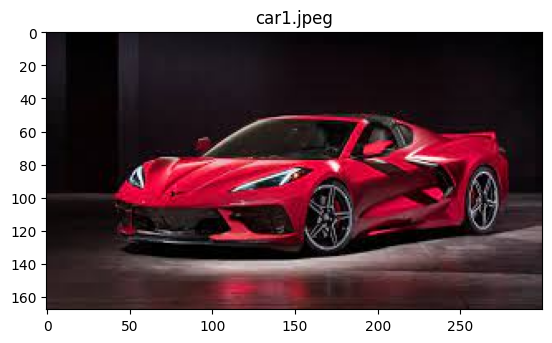

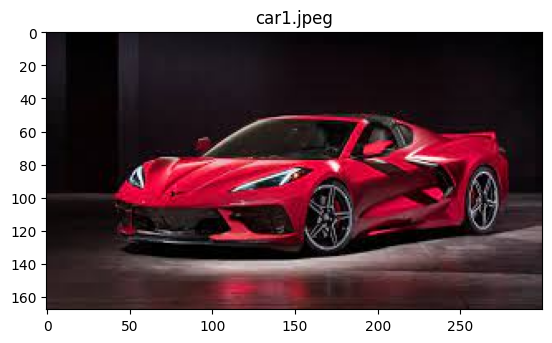

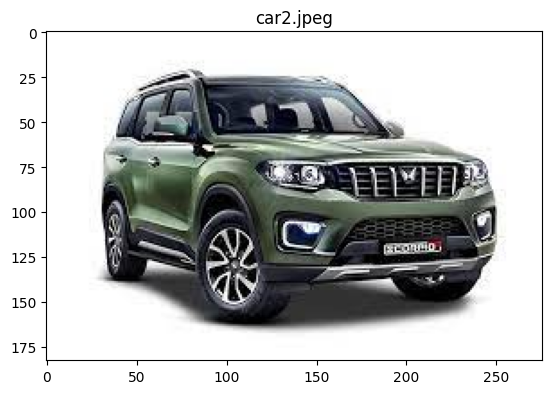

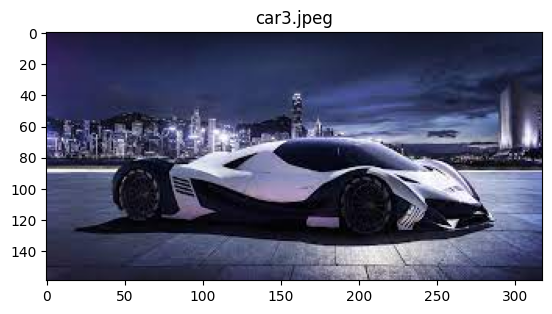

In [68]:
for i in range(num_entries):
    
    filename = db.fs.files.find()[i]['filename']
    
    data = fs.get_last_version(filename).read()

    pil_img = Image.open(io.BytesIO(data))
    plt.imshow(pil_img)
    plt.title(filename)
    plt.show()